In [1]:
import torch

In [2]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [3]:
def forward(x):
    y = w*x + b
    return y

In [4]:
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [5]:
x = torch.tensor([[4,6],[7,9]])
forward(x)


tensor([[13., 19.],
        [22., 28.]], grad_fn=<AddBackward0>)

# Linear class

In [6]:
from torch.nn import Linear

## tests
* pour x, la première dimension correspond au nombre d'exemples.  
* dans le modèle linéaire, si la première dimension est manquante, le modèle considère qu'il n'y a qu'une mesure

In [7]:
model_t = Linear(in_features=2, out_features=6)
x = torch.FloatTensor([[1,2],[1,2],[0,2]]) # 3 mesures, 2 inputs par mesures 
model_t.bias.shape, model_t.weight.shape, x.shape, model_t(x).shape, model_t(x)

(torch.Size([6]),
 torch.Size([6, 2]),
 torch.Size([3, 2]),
 torch.Size([3, 6]),
 tensor([[-0.3239, -0.4408, -1.6631, -1.8555, -0.1249, -0.0414],
         [-0.3239, -0.4408, -1.6631, -1.8555, -0.1249, -0.0414],
         [-0.7724, -1.0967, -1.2137, -1.5883,  0.3795, -0.4595]],
        grad_fn=<AddmmBackward>))

In [8]:
x1 = torch.FloatTensor([1,2]) # une seule mesure, je peux supprimer une dimension
x11 = torch.FloatTensor([[1,2]]) # ou la garder (la sortie a la même dim que l'entrée)
x1.shape, model_t(x1).shape, x11.shape, model_t(x11).shape, model_t(x1), model_t(x11)

(torch.Size([2]),
 torch.Size([6]),
 torch.Size([1, 2]),
 torch.Size([1, 6]),
 tensor([-0.3239, -0.4408, -1.6631, -1.8555, -0.1249, -0.0414],
        grad_fn=<AddBackward0>),
 tensor([[-0.3239, -0.4408, -1.6631, -1.8555, -0.1249, -0.0414]],
        grad_fn=<AddmmBackward>))

## on est reparti

In [9]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1) #for each output, there is only one input
print(model.bias, model.weight) # model is initialised with values for parameters (not the same as sklearn)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [10]:
x = torch.tensor([[[2.0], [3.3]]])
x.shape,model(x).shape

(torch.Size([1, 2, 1]), torch.Size([1, 2, 1]))

# Custom modules

In [11]:
import torch.nn as nn

In [12]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred


In [13]:
torch.manual_seed(1)
model = LR(1,1)
x = torch.tensor([[1.0], [2.0]])
model.forward(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

In [14]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [15]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[0.5153]])
linear.bias tensor([-0.4414])


# Creating dataset

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

Text(0.5, 0, 'x')

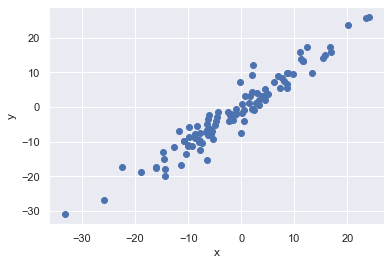

In [17]:
X = torch.randn(100,1)*10
y = X + torch.randn(100,1)*3
plt.plot(X,y, 'o')
plt.ylabel("y")
plt.xlabel("x")

In [18]:
[w,b] = model.parameters()
w,b, w[0,0].item(), b[0].item()

(Parameter containing:
 tensor([[0.5153]], requires_grad=True),
 Parameter containing:
 tensor([-0.4414], requires_grad=True),
 0.5152631998062134,
 -0.44137823581695557)

In [19]:
def get_params():
    [w,b] = model.parameters()
    return (w[0,0].item(), b[0].item())

In [20]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = torch.tensor([-30,30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X,y)


# training - code implementation

In [21]:
import datetime
N = 100
X = torch.randn(N,1)*10 # N mesures différentes, 1 seul input par mesure
y = X + torch.randn(N,1)*3 # N mesures différentes, 1 seul output par mesure
# we use MSE loss function and stochastic grandient descent
torch.manual_seed(1)
model = LR(1,1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.0001)

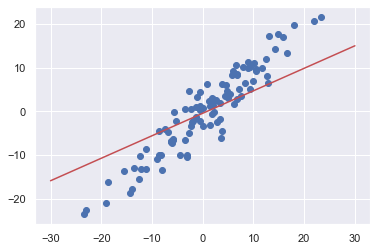

In [22]:
plot_fit("Initial Model")

In [23]:

# An epoch is complete whenever every point has been already used for computing the loss. For batch gradient descent, this is trivial, as it uses all points for computing the loss — one epoch is the same as one update. For stochastic gradient descent, one epoch means N updates, while for mini-batch (of size n), one epoch has N/n updates.
epochs = 100
losses = []
for i in range(epochs):
# at each step, i compute the whole loss then i get the derivative of the model parameters and use them in the optimizer step
# so even if i say i do a SGD, it is really a full gradient descent
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    # print(model.linear.bias.item(), model.linear.weight.item(), loss)
    
    losses.append(loss)
    optimizer.zero_grad() # we set the grad to zero because gradient accumulate if not
    loss.backward()
    # print(loss,model.linear.bias.item(), model.linear.bias.grad, model.linear.weight.item(), model.linear.weight.grad)
    optimizer.step()

epoch: 0 loss: 28.91457748413086
epoch: 1 loss: 28.260889053344727
epoch: 2 loss: 27.629863739013672
epoch: 3 loss: 27.02069854736328
epoch: 4 loss: 26.432653427124023
epoch: 5 loss: 25.864988327026367
epoch: 6 loss: 25.316997528076172
epoch: 7 loss: 24.788000106811523
epoch: 8 loss: 24.27733612060547
epoch: 9 loss: 23.78436851501465
epoch: 10 loss: 23.308488845825195
epoch: 11 loss: 22.849102020263672
epoch: 12 loss: 22.4056339263916
epoch: 13 loss: 21.977540969848633
epoch: 14 loss: 21.564285278320312
epoch: 15 loss: 21.16534996032715
epoch: 16 loss: 20.780244827270508
epoch: 17 loss: 20.408485412597656
epoch: 18 loss: 20.049612045288086
epoch: 19 loss: 19.703174591064453
epoch: 20 loss: 19.36874771118164
epoch: 21 loss: 19.04590606689453
epoch: 22 loss: 18.734256744384766
epoch: 23 loss: 18.433412551879883
epoch: 24 loss: 18.142990112304688
epoch: 25 loss: 17.862634658813477
epoch: 26 loss: 17.591997146606445
epoch: 27 loss: 17.330738067626953
epoch: 28 loss: 17.07853126525879
epoch

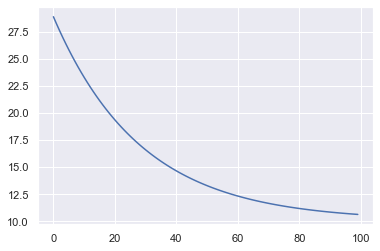

In [24]:
plt.plot(range(epochs),losses)

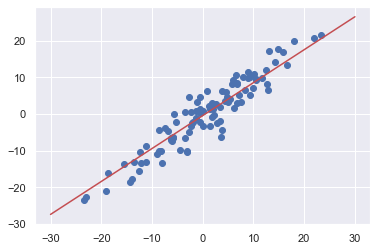

In [25]:
plot_fit("Trained model")